In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data=pd.read_csv("Titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
print("no. of passengers in original data:"+str(len(titanic_data.index)))

no. of passengers in original data:891


## Analyzing Data


<Axes: xlabel='Survived', ylabel='count'>

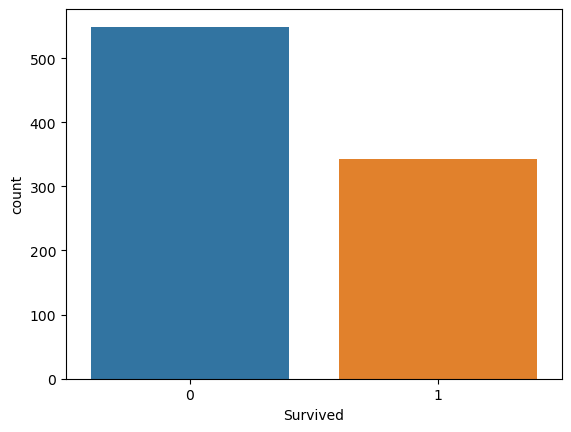

In [3]:
sns.countplot(x="Survived",data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

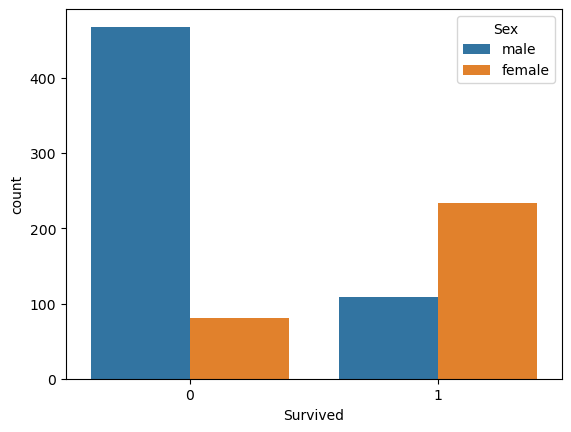

In [4]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

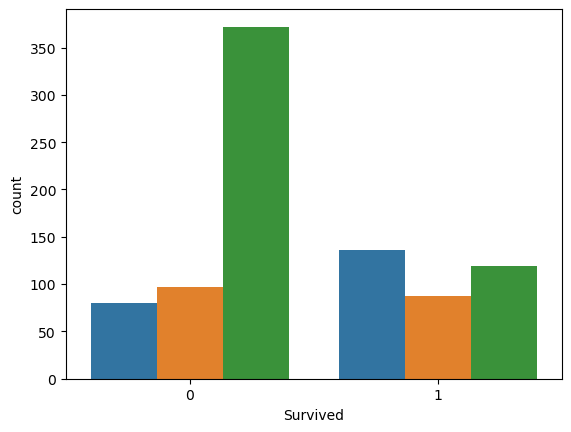

In [5]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

<Axes: ylabel='Frequency'>

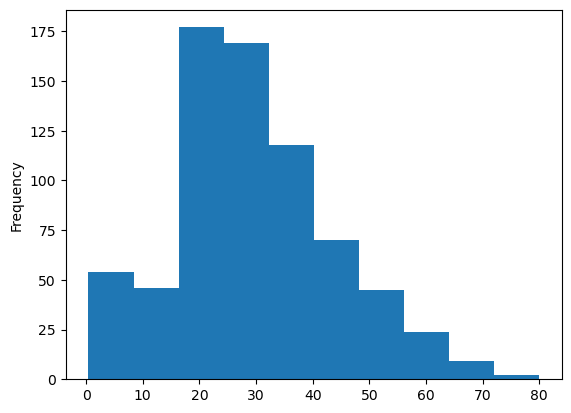

In [6]:
titanic_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

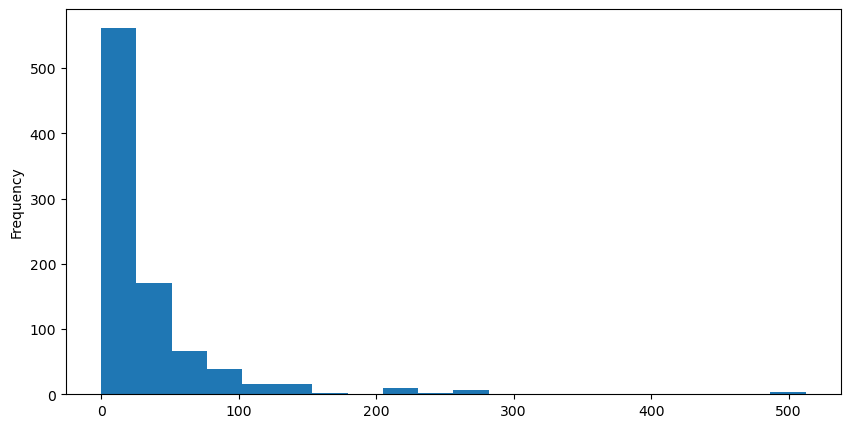

In [7]:
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

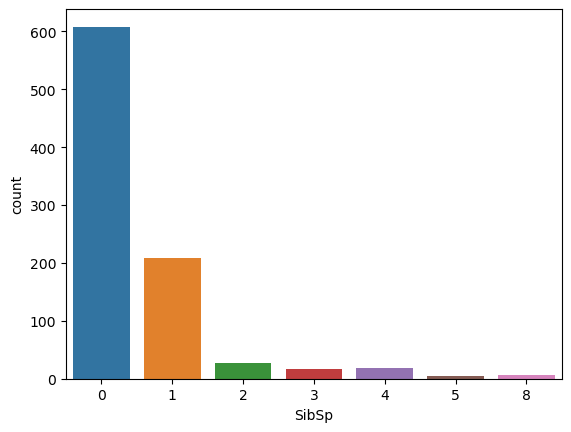

In [9]:
sns.countplot(x="SibSp",data=titanic_data)

## Data Wrangling/Cleaning

In [10]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
null_data=titanic_data.isnull()
null_data_as_int = null_data.astype(int)

print(null_data_as_int)

     PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
0              0         0       0     0    0    0      0      0       0   
1              0         0       0     0    0    0      0      0       0   
2              0         0       0     0    0    0      0      0       0   
3              0         0       0     0    0    0      0      0       0   
4              0         0       0     0    0    0      0      0       0   
..           ...       ...     ...   ...  ...  ...    ...    ...     ...   
886            0         0       0     0    0    0      0      0       0   
887            0         0       0     0    0    0      0      0       0   
888            0         0       0     0    0    1      0      0       0   
889            0         0       0     0    0    0      0      0       0   
890            0         0       0     0    0    0      0      0       0   

     Fare  Cabin  Embarked  
0       0      1         0  
1       0      0         0  


In [13]:
null_data_as_int.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

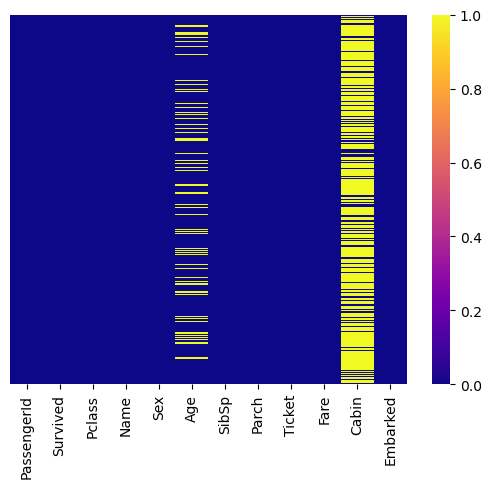

In [14]:
sns.heatmap(null_data_as_int,yticklabels=False,cmap="plasma")

<Axes: xlabel='Pclass', ylabel='Age'>

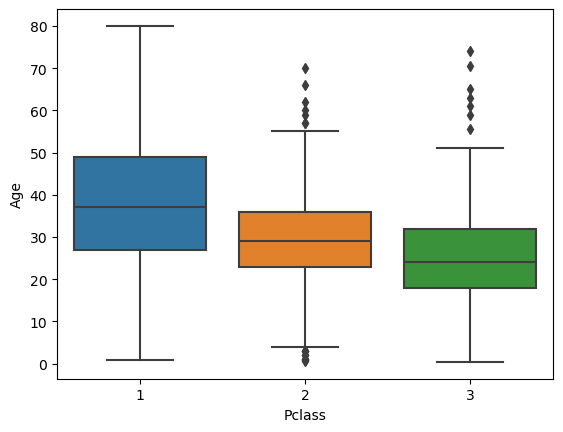

In [15]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [16]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [18]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
titanic_data.dropna(inplace=True)

<Axes: >

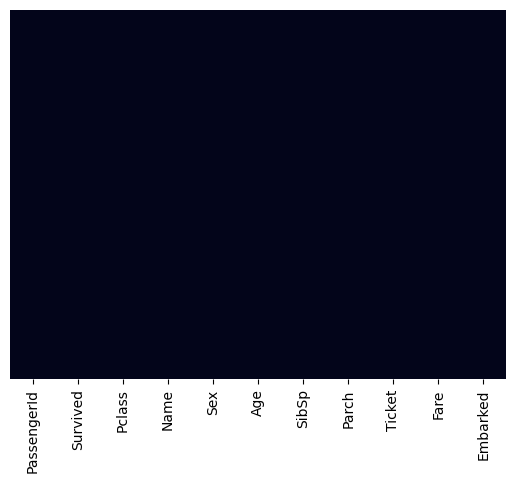

In [21]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [22]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [25]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True) #dropping female as we need only one of male and female 
sex1=sex.astype(int)
sex1.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark = embark.astype(int)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl=Pcl.astype(int)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [28]:
#concatinating all rows
titanic_data=pd.concat([titanic_data,sex1,embark,Pcl],axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [29]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [31]:
titanic_data.drop('Pclass',axis=1,inplace=True)

In [32]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Data

In [33]:
X=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [40]:
print(X_train.isnull().sum())
print(X_train.dtypes)

Age      0
SibSp    0
Parch    0
Fare     0
male     0
Q        0
S        0
2        0
3        0
dtype: int64
Age      float64
SibSp      int64
Parch      int64
Fare     float64
male       int32
Q          int32
S          int32
2          int32
3          int32
dtype: object


In [43]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)  # Example: Filling missing values with 0

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test.fillna(0, inplace=True)  

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel=Logistic()